### Libraries

In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import plotly.express as px
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
%matplotlib inline

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

## EDA of Dataset

In [4]:
df.describe().T

count          mean           std         min           25%  \
Time    284807.0  9.481386e+04  47488.145955    0.000000  54201.500000   
V1      284807.0  3.918649e-15      1.958696  -56.407510     -0.920373   
V2      284807.0  5.682686e-16      1.651309  -72.715728     -0.598550   
V3      284807.0 -8.761736e-15      1.516255  -48.325589     -0.890365   
V4      284807.0  2.811118e-15      1.415869   -5.683171     -0.848640   
V5      284807.0 -1.552103e-15      1.380247 -113.743307     -0.691597   
V6      284807.0  2.040130e-15      1.332271  -26.160506     -0.768296   
V7      284807.0 -1.698953e-15      1.237094  -43.557242     -0.554076   
V8      284807.0 -1.893285e-16      1.194353  -73.216718     -0.208630   
V9      284807.0 -3.147640e-15      1.098632  -13.434066     -0.643098   
V10     284807.0  1.772925e-15      1.088850  -24.588262     -0.535426   
V11     284807.0  9.289524e-16      1.020713   -4.797473     -0.762494   
V12     284807.0 -1.803266e-15      0.999201  -18.683715     -0.405571   
V13     284807.0  1.674888e-15      0.995274   -5.791881     -0.648539   
V14     284807.0  1.475621e-15      0.958596  -19.214325     -0.425574   
V15     284807.0  3.501098e-15      0.915316   -4.498945     -0.582884   
V16     284807.0  1.392460e-15      0.876253  -14.129855     -0.468037   
V17     284807.0 -7.466538e-16      0.849337  -25.162799     -0.483748   
V18     284807.0  4.258754e-16      0.838176   -9.498746     -0.498850   
V19     284807.0  9.019919e-16      0.814041   -7.213527     -0.456299   
V20     284807.0  5.126845e-16      0.770925  -54.497720     -0.211721   
V21     284807.0  1.473120e-16      0.734524  -34.830382     -0.228395   
V22     284807.0  8.042109e-16      0.725702  -10.933144     -0.542350   
V23     284807.0  5.282512e-16      0.624460  -44.807735     -0.161846   
V24     284807.0  4.456271e-15      0.605647   -2.836627     -0.354586   
V25     284807.0  1.426896e-15      0.521278  -10.295397     -0.317145   
V26     284807.0  1.701640e-15      0.482227   -2.604551     -0.326984   
V27     284807.0 -3.662252e-16      0.403632  -22.565679     -0.070840   
V28     284807.0 -1.217809e-16      0.330083  -15.430084     -0.052960   
Amount  284807.0  8.834962e+01    250.120109    0.000000      5.600000   
Class   284807.0  1.727486e-03      0.041527    0.000000      0.000000   

                 50%            75%            max  
Time    84692.000000  139320.500000  172792.000000  
V1          0.018109       1.315642       2.454930  
V2          0.065486       0.803724      22.057729  
V3          0.179846       1.027196       9.382558  
V4         -0.019847       0.743341      16.875344  
V5         -0.054336       0.611926      34.801666  
V6         -0.274187       0.398565      73.301626  
V7          0.040103       0.570436     120.589494  
V8          0.022358       0.327346      20.007208  
V9         -0.051429       0.597139      15.594995  
V10        -0.092917       0.453923      23.745136  
V11        -0.032757       0.739593      12.018913  
V12         0.140033       0.618238       7.848392  
V13        -0.013568       0.662505       7.126883  
V14         0.050601       0.493150      10.526766  
V15         0.048072       0.648821       8.877742  
V16         0.066413       0.523296      17.315112  
V17        -0.065676       0.399675       9.253526  
V18        -0.003636       0.500807       5.041069  
V19         0.003735       0.458949       5.591971  
V20        -0.062481       0.133041      39.420904  
V21        -0.029450       0.186377      27.202839  
V22         0.006782       0.528554      10.503090  
V23        -0.011193       0.147642      22.528412  
V24         0.040976       0.439527       4.584549  
V25         0.016594       0.350716       7.519589  
V26        -0.052139       0.240952       3.517346  
V27         0.001342       0.091045      31.612198  
V28         0.011244       0.078280      33.847808  
Amount     22.000000      77.165000   25691.160000  

In [5]:
df.isnull().sum().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df['Class'].value_counts()


0    284315
1       492
Name: Class, dtype: int64

In [8]:
labels=["Genuine","Fraud"]

fraud_or_not = df["Class"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=df['Class'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","orange"]
             ,title="Fraud vs Genuine transactions")
fig.show()

Text(0.5, 1.0, 'Count by Class Label')

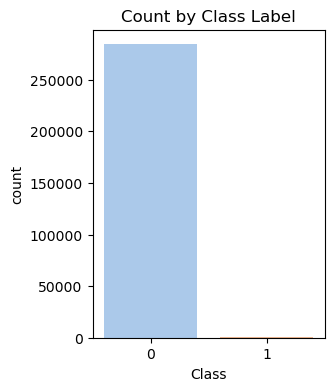

In [9]:
plt.figure(figsize=(3,4))

sns.countplot(x=df['Class'], palette="pastel")
plt.title('Count by Class Label')

In [10]:
print('Genuine:', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds:', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Genuine: 99.83 % of the dataset
Frauds: 0.17 % of the dataset


### Remove Duplicate Values

In [11]:
df.duplicated().sum()

1081

In [12]:
df = df.copy()

df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")
print("*" * 100)

Duplicated values dropped succesfully
****************************************************************************************************


In [13]:
df.duplicated().sum()

0

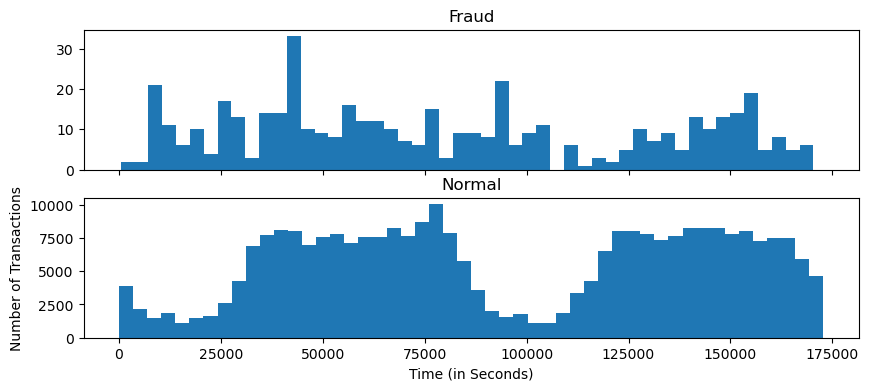

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,4))

ax1.hist(df.Time[df.Class == 1], bins = 50, )
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = 50)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

The 'Time' feature looks pretty similar across both types of transactions

In [15]:
#drop the Time feature
df = df.drop('Time', axis=1)
df.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 30 columns]

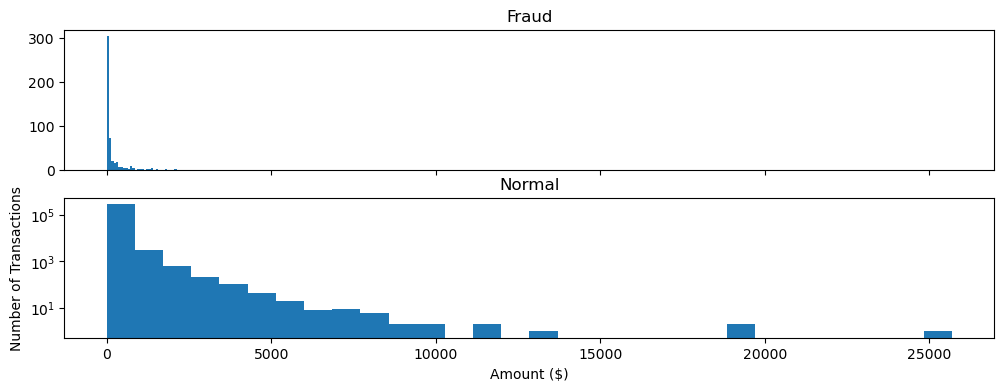

In [16]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

ax1.hist(df.Amount[df.Class == 1], bins = 30)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = 30)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

Should we Normalize Amount feature?

C:\Users\P88\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\P88\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\P88\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\P88\anaconda3\lib\site-packages\se

C:\Users\P88\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\P88\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\P88\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\P88\anaconda3\lib\site-packages\se

C:\Users\P88\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\P88\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\P88\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\P88\anaconda3\lib\site-packages\se

IndexError: index 28 is out of bounds for GridSpec with size 28

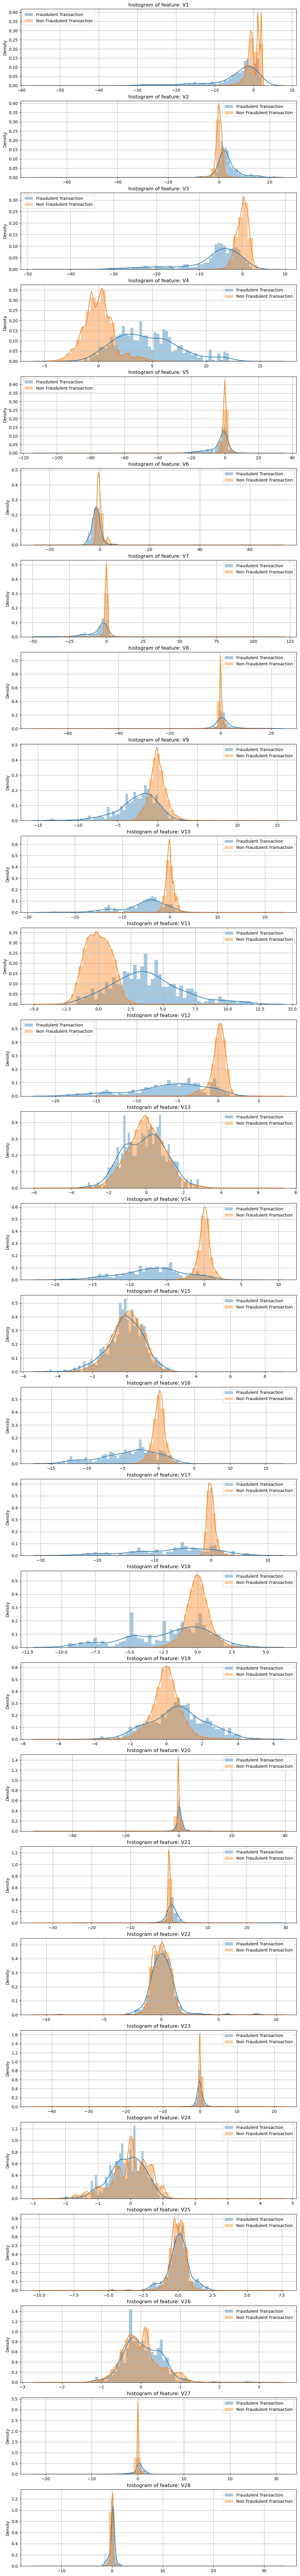

In [18]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50, label='Fraudulent Transaction')
    sns.distplot(df[cn][df.Class == 0], bins=50, label='Non Fraudulent Fransaction')
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
    plt.legend()
    plt.grid()
plt.show()

In [19]:
labels=["Genuine","Fraud"]

fraud_or_not = df["Class"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=df['Class'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","orange"]
             ,title="Fraud vs Genuine transactions")
fig.show()

<AxesSubplot:xlabel='V10', ylabel='V2'>

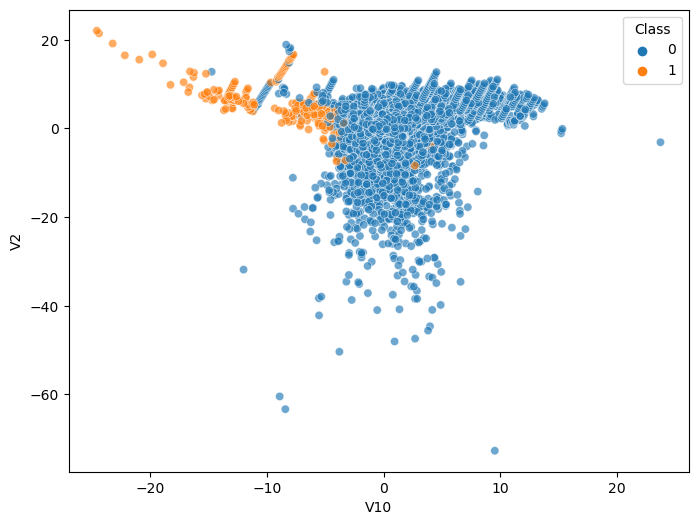

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(y = 'V2', x = 'V10', hue = 'Class', data = df, alpha=0.65)

In [21]:
X = df.drop(labels='Class', axis=1)
y = df['Class']
X.shape

(283726, 29)

### Corelation of each feature with label

In [22]:
correlations = X.corrwith(y)

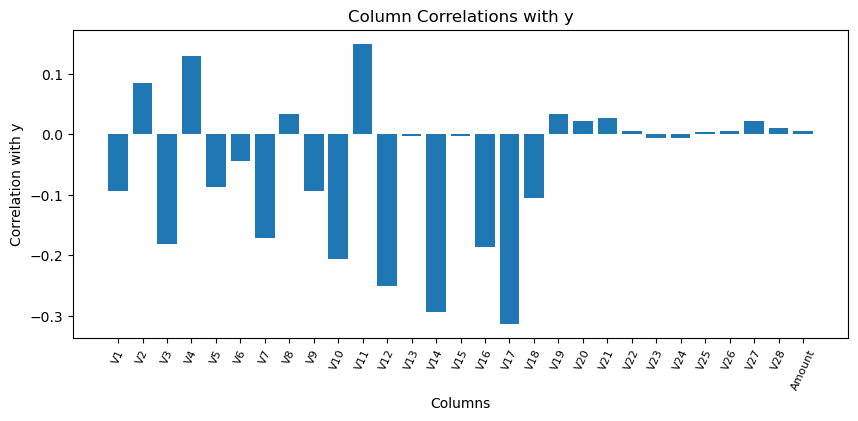

In [23]:
# Create the bar plot
plt.figure(figsize=(10,4))
plt.tight_layout
plt.bar(correlations.index, correlations)
plt.xticks(rotation=65)
plt.xticks(fontsize=8)

# Set the plot title
plt.title('Column Correlations with y')

# Set the x-axis label
plt.xlabel('Columns')

# Set the y-axis label
plt.ylabel('Correlation with y')

# Show the plot
plt.show()


### Normalizing the Feature

In [24]:
#do we need Normalization?
X.max().max()

25691.16

In [25]:
X.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [26]:
X.max().max()


25691.16

In [27]:

from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = np.round(standardizer.fit_transform(X), 3)


In [28]:
X.max().max()

103.185

In [29]:
X.min().min()

-82.603

In [30]:
type(X)

numpy.ndarray

In [31]:
normal_X = pd.DataFrame(data = X, columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])

In [32]:
type(normal_X)

pandas.core.frame.DataFrame

### Feature Engineering

In [33]:
# #Drop all of the features that have very similar distributions between the two types of transactions.
# new_X = normal_X.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'], axis =1)

In [34]:
# #Based on the plots above, these features are created to identify values where fraudulent transaction are more common.
# new_X['V1_'] = df.V1.map(lambda x: 1 if x < -3 else 0)
# new_X['V2_'] = df.V2.map(lambda x: 1 if x > 2.5 else 0)
# new_X['V3_'] = df.V3.map(lambda x: 1 if x < -4 else 0)
# new_X['V4_'] = df.V4.map(lambda x: 1 if x > 2.5 else 0)
# new_X['V5_'] = df.V5.map(lambda x: 1 if x < -4.5 else 0)
# new_X['V6_'] = df.V6.map(lambda x: 1 if x < -2.5 else 0)
# new_X['V7_'] = df.V7.map(lambda x: 1 if x < -3 else 0)
# new_X['V9_'] = df.V9.map(lambda x: 1 if x < -2 else 0)
# new_X['V10_'] = df.V10.map(lambda x: 1 if x < -2.5 else 0)
# new_X['V11_'] = df.V11.map(lambda x: 1 if x > 2 else 0)
# new_X['V12_'] = df.V12.map(lambda x: 1 if x < -2 else 0)
# new_X['V14_'] = df.V14.map(lambda x: 1 if x < -2.5 else 0)
# new_X['V16_'] = df.V16.map(lambda x: 1 if x < -2 else 0)
# new_X['V17_'] = df.V17.map(lambda x: 1 if x < -2 else 0)
# new_X['V18_'] = df.V18.map(lambda x: 1 if x < -2 else 0)
# new_X['V19_'] = df.V19.map(lambda x: 1 if x > 1.5 else 0)
# new_X['V21_'] = df.V21.map(lambda x: 1 if x > 0.6 else 0)

In [35]:
normal_X.head()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  ...  \
0 -0.701 -0.042  1.680  0.977 -0.247  0.348  0.194  0.084  0.334  0.086  ...   
1  0.609  0.164  0.109  0.319  0.042 -0.061 -0.066  0.073 -0.232 -0.154  ...   
2 -0.700 -0.811  1.174  0.271 -0.367  1.353  0.643  0.211 -1.381  0.194  ...   
3 -0.499 -0.110  1.187 -0.608 -0.009  0.937  0.192  0.321 -1.265 -0.050  ...   
4 -0.598  0.536  1.025  0.287 -0.297  0.073  0.482 -0.229  0.748  0.701  ...   

     V20    V21    V22    V23    V24    V25    V26    V27    V28  Amount  
0  0.326 -0.025  0.383 -0.177  0.110  0.247 -0.393  0.333 -0.066   0.244  
1 -0.090 -0.311 -0.881  0.162 -0.562  0.321  0.261 -0.027  0.043  -0.343  
2  0.682  0.343  1.065  1.458 -1.138 -0.628 -0.289 -0.144 -0.184   1.159  
3 -0.270 -0.149  0.007 -0.305 -1.941  1.242 -0.461  0.154  0.186   0.140  
4  0.530 -0.013  1.102 -0.221  0.233 -0.395  1.042  0.550  0.654  -0.074  

[5 rows x 29 columns]

In [36]:
print(normal_X.shape)
print(y.shape)

(283726, 29)
(283726,)


## Train test split

In [37]:

from collections import Counter
X_train, X_test, y_train, y_test = train_test_split(normal_X, y, test_size=0.2, random_state=42)
# Check the number of records
Counter(y_train)

Counter({0: 226597, 1: 383})

In [38]:
X_train.shape

(226980, 29)

In [39]:
y_train.shape

(226980,)

In [40]:

print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority (Normal Trainsactions) class and {sorted(Counter(y_train).items())[1][1]} records for the minority (Fraud) class.")

The training dataset has 226597 records for the majority (Normal Trainsactions) class and 383 records for the minority (Fraud) class.


In [41]:
# fitting the training dataset in RandomForest model
from sklearn.ensemble import RandomForestClassifier
ooberror = [] 
total_accuracy = []
for i in range(10, 100, 10):
    rfc = RandomForestClassifier(n_estimators=i, oob_score=True)
    rfc.fit(X_train, y_train)
    ooberror.append(1-rfc.oob_score_)
    total_accuracy.append(rfc.score(X_test, y_test))

C:\Users\P88\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.

C:\Users\P88\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.



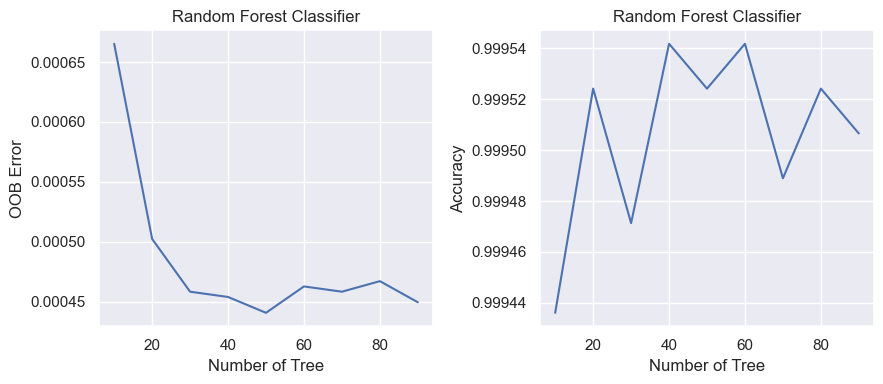

In [54]:
plt.figure(figsize=(9, 4))

plt.subplot(1, 2, 1)
plt.plot(range(10, 100, 10), ooberror)
plt.xlabel("Number of Tree")
plt.ylabel("OOB Error")

plt.title("Random Forest Classifier")

plt.subplot(1, 2, 2)

plt.plot(range(10, 100, 10), total_accuracy)
plt.xlabel("Number of Tree")
plt.ylabel("Accuracy")

plt.title("Random Forest Classifier")
plt.tight_layout()
plt.show()

In [62]:
# Train the random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf = RandomForestClassifier(n_estimators=4)
model = rf.fit(X_train, y_train)
prediction = model.predict(X_test)
# Check the model performance

print(confusion_matrix(y_test, prediction))
print('*'*100)
print(accuracy_score(y_test, prediction))
print('*'*100)
print(classification_report(y_test, prediction))

[[56652     4]
 [   28    62]]
****************************************************************************************************
0.9994360836006062
****************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.94      0.69      0.79        90

    accuracy                           1.00     56746
   macro avg       0.97      0.84      0.90     56746
weighted avg       1.00      1.00      1.00     56746



In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction)

TN, FP, FN, TP = confusion_matrix(y_test, prediction).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP)  =  62
False Positive(FP) =  4
True Negative(TN)  =  56652
False Negative(FN) =  28
Accuracy of the binary classification = 0.999


# Sampling the imbalanced dataset

### 1. Random Oversampling for Imbalanced Dataset

In [64]:
# Oversampling and under sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [65]:
# Randomly over sample the minority class
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)
# Check the number of records after over sampling
print(sorted(Counter(y_train_ros).items()))

[(0, 226597), (1, 226597)]


In [66]:
# Convert the data from numpy array to a pandas dataframe
new_df = X_train_ros.copy()
new_df['Class'] = y_train_ros
new_df['Class'].value_counts()

0    226597
1    226597
Name: Class, dtype: int64

<AxesSubplot:xlabel='V6', ylabel='V1'>

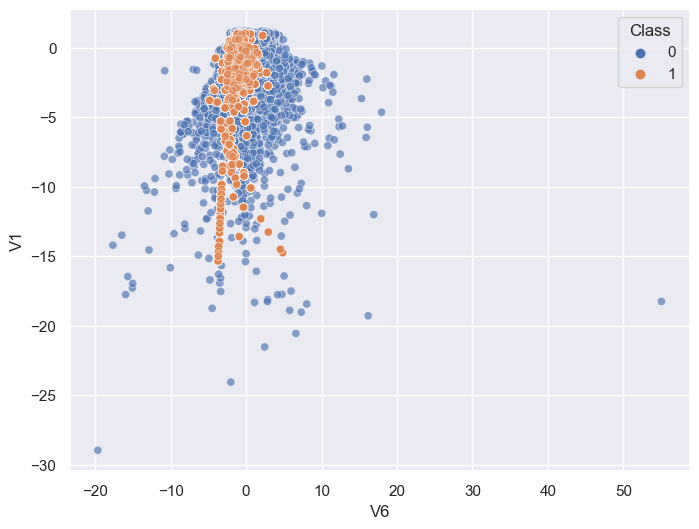

In [67]:
plt.figure(figsize=(8, 6))
sns.scatterplot(y = 'V1', x = 'V6', hue = 'Class', data = new_df, alpha=0.65)

In [68]:
labels=["Genuine","Fraud"]

fraud_or_not = new_df["Class"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=new_df['Class'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","orange"], 
             title="Fraud vs Genuine transactions")
fig.show()

In [69]:
# fitting the training dataset in RandomForest model
from sklearn.ensemble import RandomForestClassifier
ooberror_ros = [] 
total_accuracy_ros = []
for i in range(10, 100, 10):
    rfc = RandomForestClassifier(n_estimators=i, oob_score=True)
    rfc.fit(X_train_ros, y_train_ros)
    ooberror_ros.append(1-rfc.oob_score_)
    total_accuracy_ros.append(rfc.score(X_test, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.



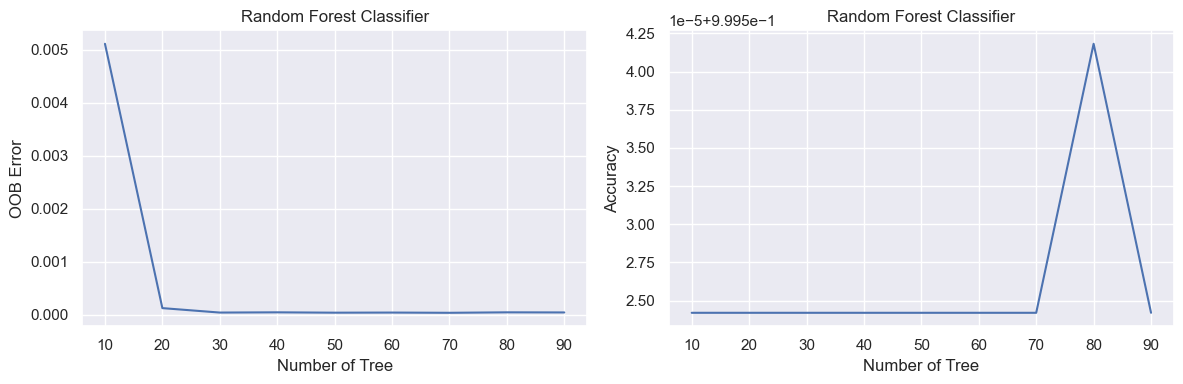

In [71]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(10, 100, 10), ooberror_ros)
plt.xlabel("Number of Tree")
plt.ylabel("OOB Error")

plt.title("Random Forest Classifier")

plt.subplot(1, 2, 2)

plt.plot(range(10, 100, 10), total_accuracy_ros)
plt.xlabel("Number of Tree")
plt.ylabel("Accuracy")
plt.title("Random Forest Classifier")

plt.tight_layout()
plt.show()

In [72]:
# Train the random forest model
rf = RandomForestClassifier(n_estimators=80)
ros_model = rf.fit(X_train_ros, y_train_ros)
ros_prediction = ros_model.predict(X_test)
# Check the model performance
print(confusion_matrix(y_test, ros_prediction))
print('*'*100)
print(accuracy_score(y_test, ros_prediction))
print('*'*100)
print(classification_report(y_test, ros_prediction))

[[56653     3]
 [   25    65]]
****************************************************************************************************
0.9995065731505305
****************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.96      0.72      0.82        90

    accuracy                           1.00     56746
   macro avg       0.98      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746



In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ros_prediction)

TN, FP, FN, TP = confusion_matrix(y_test, ros_prediction).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.2f}'.format(accuracy))

True Positive(TP)  =  65
False Positive(FP) =  3
True Negative(TN)  =  56653
False Negative(FN) =  25
Accuracy of the binary classification = 1.000


### 2. SMOTE Oversampling for Imbalanced Dataset

In [96]:
# Randomly over sample the minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote= smote.fit_resample(X_train, y_train)
# Check the number of records after over sampling
print(sorted(Counter(y_train_smote).items()))

[(0, 226597), (1, 226597)]


In [97]:
# Convert the data from numpy array to a pandas dataframe
new_df_smote = X_train_smote.copy()
new_df_smote['Class'] = y_train_smote
new_df_smote['Class'].value_counts()

0    226597
1    226597
Name: Class, dtype: int64

<AxesSubplot:xlabel='V6', ylabel='V1'>

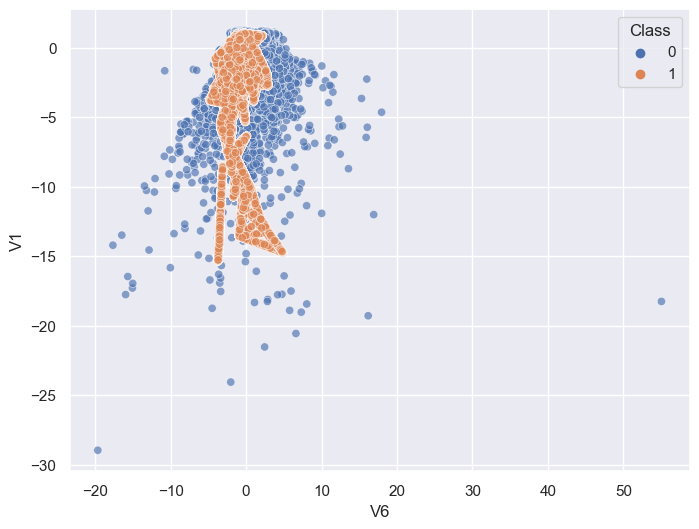

In [98]:
plt.figure(figsize=(8, 6))
sns.scatterplot(y = 'V1', x = 'V6', hue = 'Class', data = new_df_smote, alpha=0.65)

In [99]:
labels=["Genuine","Fraud"]

fraud_or_not = new_df_smote["Class"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=new_df_smote['Class'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","orange"], 
             title="Fraud vs Genuine transactions")
fig.show()

In [100]:
# fitting the training dataset in RandomForest model
from sklearn.ensemble import RandomForestClassifier
ooberror_smote = [] 
total_accuracy_smote = []
for i in range(10, 100, 10):
    rfc = RandomForestClassifier(n_estimators=i, oob_score=True)
    rfc.fit(X_train_smote, y_train_smote)
    ooberror_smote.append(1-rfc.oob_score_)
    total_accuracy_smote.append(rfc.score(X_test, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.



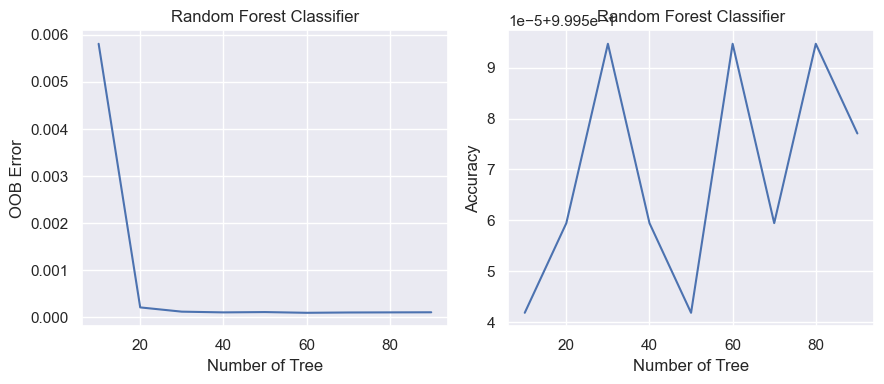

In [102]:
plt.figure(figsize=(9, 4))

plt.subplot(1, 2, 1)
plt.plot(range(10, 100, 10), ooberror_smote)
plt.xlabel("Number of Tree")
plt.ylabel("OOB Error")

plt.title("Random Forest Classifier")

plt.subplot(1, 2, 2)

plt.plot(range(10, 100, 10), total_accuracy_smote)
plt.xlabel("Number of Tree")
plt.ylabel("Accuracy")
plt.title("Random Forest Classifier")
plt.tight_layout()
plt.show()

In [283]:
# Train the random forest model
rf = RandomForestClassifier(n_estimators=20)
smote_model = rf.fit(X_train_smote, y_train_smote)
smote_prediction = smote_model.predict(X_test)
# Check the model performance
print(classification_report(y_test, smote_prediction))

print(confusion_matrix(y_test, smote_prediction))
print('*'*100)
print(accuracy_score(y_test, smote_prediction))
print('*'*100)
print(classification_report(y_test, smote_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.91      0.76      0.82        90

    accuracy                           1.00     56746
   macro avg       0.95      0.88      0.91     56746
weighted avg       1.00      1.00      1.00     56746

[[56649     7]
 [   22    68]]
****************************************************************************************************
0.9994889507630493
****************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.91      0.76      0.82        90

    accuracy                           1.00     56746
   macro avg       0.95      0.88      0.91     56746
weighted avg       1.00      1.00      1.00     56746



In [285]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, smote_prediction)

TN, FP, FN, TP = confusion_matrix(y_test, smote_prediction).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP)  =  68
False Positive(FP) =  7
True Negative(TN)  =  56649
False Negative(FN) =  22
Accuracy of the binary classification = 0.999


### 3. Random Under-Sampling


In [138]:
# Randomly under sample the majority class
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)
# Check the number of records after under sampling
print(sorted(Counter(y_train_rus).items()))


[(0, 383), (1, 383)]


In [139]:
# Convert the data from numpy array to a pandas dataframe
new_df_rus = X_train_rus.copy()
new_df_rus['Class'] = y_train_rus
new_df_rus['Class'].value_counts()

0    383
1    383
Name: Class, dtype: int64

Text(0.5, 1.0, 'Random Under Sampling')

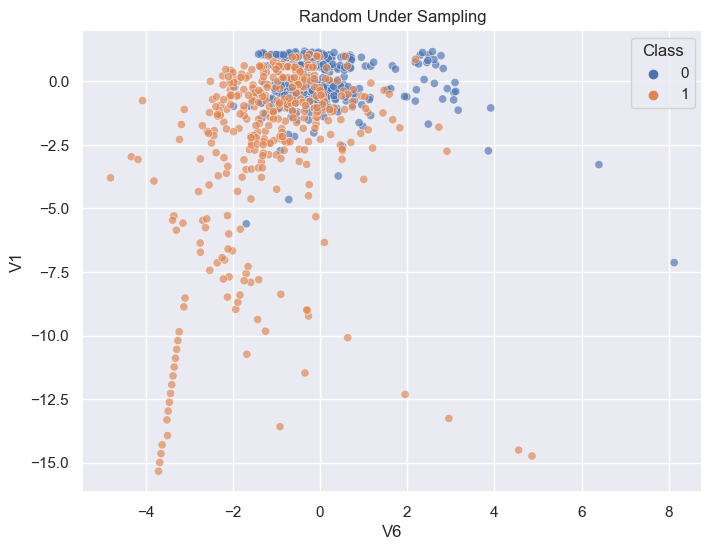

In [140]:

plt.figure(figsize=(8, 6))
sns.scatterplot(y = 'V1', x = 'V6', hue = 'Class', data = new_df_rus, alpha=0.65)
plt.title('Random Under Sampling')

In [141]:
labels=["Genuine","Fraud"]

fraud_or_not = new_df["Class"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=new_df['Class'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","orange"], 
             title="Fraud vs Genuine transactions")
fig.show()

In [144]:
# fitting the training dataset in RandomForest model
from sklearn.ensemble import RandomForestClassifier
ooberror_rus = [] 
total_accuracy_rus = []
for i in range(10, 100, 10):
    rfc = RandomForestClassifier(n_estimators=i, oob_score=True)
    rfc.fit(X_train_rus, y_train_rus)
    ooberror_rus.append(1-rfc.oob_score_)
    total_accuracy_rus.append(rfc.score(X_test, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.



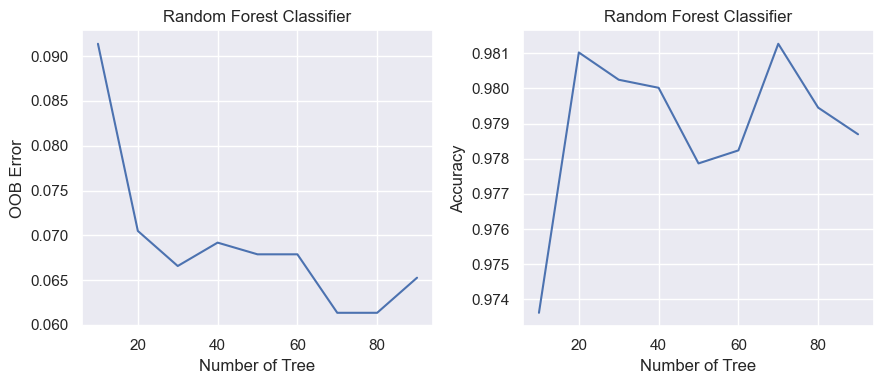

In [145]:
plt.figure(figsize=(9, 4))

plt.subplot(1, 2, 1)
plt.plot(range(10, 100, 10), ooberror_rus)
plt.xlabel("Number of Tree")
plt.ylabel("OOB Error")
plt.title("Random Forest Classifier")

plt.subplot(1, 2, 2)

plt.plot(range(10, 100, 10), total_accuracy_rus)
plt.xlabel("Number of Tree")
plt.ylabel("Accuracy")
plt.title("Random Forest Classifier")
plt.tight_layout()
plt.show()

In [146]:
# Train the random forest model
rf = RandomForestClassifier(n_estimators=20)
rus_model = rf.fit(X_train_rus, y_train_rus)
rus_prediction = rus_model.predict(X_test)
# Check the model performance

print(confusion_matrix(y_test, rus_prediction))
print('*'*100)
print(accuracy_score(y_test, rus_prediction))
print('*'*100)
print(classification_report(y_test, rus_prediction))

[[55415  1241]
 [   13    77]]
****************************************************************************************************
0.9779015260987559
****************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56656
           1       0.06      0.86      0.11        90

    accuracy                           0.98     56746
   macro avg       0.53      0.92      0.55     56746
weighted avg       1.00      0.98      0.99     56746



In [147]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rus_prediction)

TN, FP, FN, TP = confusion_matrix(y_test, rus_prediction).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP)  =  77
False Positive(FP) =  1241
True Negative(TN)  =  55415
False Negative(FN) =  13
Accuracy of the binary classification = 0.978


In [148]:
print(confusion_matrix(y_test, rus_prediction))

[[55415  1241]
 [   13    77]]


### 4. Under-Sampling Using NearMiss

In [162]:
# Under sample the majority class
nearmiss = NearMiss(version=3)
X_train_nearmiss, y_train_nearmiss= nearmiss.fit_resample(X_train, y_train)
# Check the number of records after over sampling
print(sorted(Counter(y_train_nearmiss).items()))

[(0, 325), (1, 383)]


C:\ProgramData\Anaconda3\lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:203: UserWarning:

The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.



In [163]:
# Convert the data from numpy array to a pandas dataframe
new_df_nearmiss = X_train_nearmiss.copy()
new_df_nearmiss['Class'] = y_train_nearmiss
new_df_nearmiss['Class'].value_counts()

1    383
0    325
Name: Class, dtype: int64

Text(0.5, 1.0, 'Random Under Sampling')

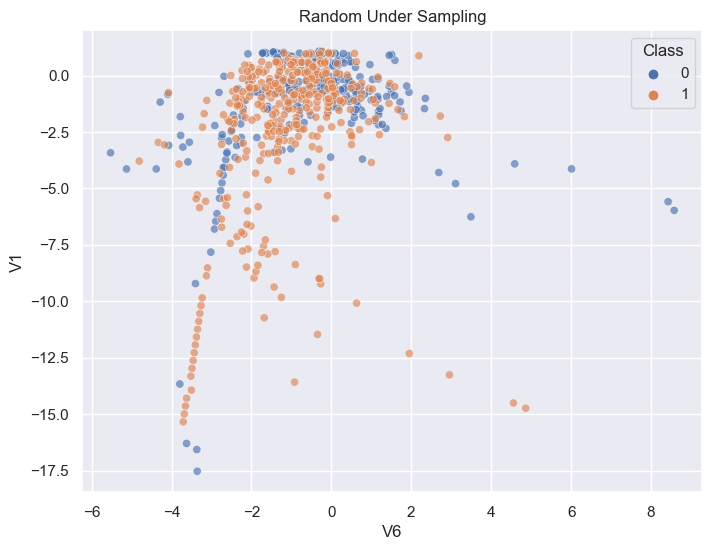

In [164]:

plt.figure(figsize=(8, 6))
sns.scatterplot(y = 'V1', x = 'V6', hue = 'Class', data = new_df_nearmiss, alpha=0.65)
plt.title('Random Under Sampling')

In [165]:
# fitting the training dataset in RandomForest model
from sklearn.ensemble import RandomForestClassifier
ooberror_nearms = [] 
total_accuracy_nearms = []
for i in range(10, 100, 10):
    rfc = RandomForestClassifier(n_estimators=i, oob_score=True)
    rfc.fit(X_train_nearmiss, y_train_nearmiss)
    ooberror_nearms.append(1-rfc.oob_score_)
    total_accuracy_nearms.append(rfc.score(X_test, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.



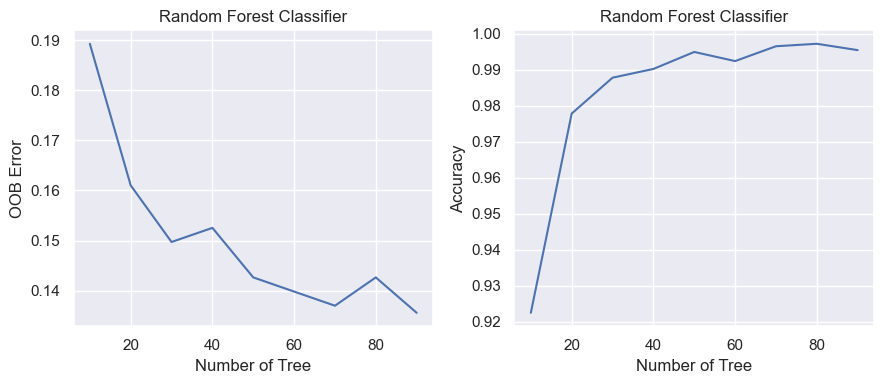

In [166]:
plt.figure(figsize=(9, 4))

plt.subplot(1, 2, 1)
plt.plot(range(10, 100, 10), ooberror_nearms)
plt.xlabel("Number of Tree")
plt.ylabel("OOB Error")
plt.title("Random Forest Classifier")

plt.subplot(1, 2, 2)

plt.plot(range(10, 100, 10), total_accuracy_nearms)
plt.xlabel("Number of Tree")
plt.ylabel("Accuracy")
plt.title("Random Forest Classifier")
plt.tight_layout()
plt.show()

In [167]:
# Train the random forest model
rf = RandomForestClassifier(n_estimators=30)
nearmiss_model = rf.fit(X_train_nearmiss, y_train_nearmiss)
nearmiss_prediction = nearmiss_model.predict(X_test)
# Check the model performance
print("confusion_matrix \n", confusion_matrix(y_test, nearmiss_prediction))
print('*'*100, )
print('Accuracy  ', rfc.score(X_test, y_test))
print('*'*100, )
print(classification_report(y_test, nearmiss_prediction))

confusion_matrix 
 [[56007   649]
 [   20    70]]
****************************************************************************************************
Accuracy   0.9954710464173686
****************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56656
           1       0.10      0.78      0.17        90

    accuracy                           0.99     56746
   macro avg       0.55      0.88      0.58     56746
weighted avg       1.00      0.99      0.99     56746



In [168]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, nearmiss_prediction)

TN, FP, FN, TP = confusion_matrix(y_test, nearmiss_prediction).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP)  =  70
False Positive(FP) =  649
True Negative(TN)  =  56007
False Negative(FN) =  20
Accuracy of the binary classification = 0.988


### We will go with Random Under-Sampling

#### 1. Decision Tree

In [305]:
X_train_rus.shape

(766, 34)

In [306]:
y_train_rus.shape

(766,)

In [307]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=3, random_state=104)
dt_model.fit(X_train_rus, y_train_rus)


DecisionTreeClassifier(max_depth=3, random_state=104)

Text(113.9222222222222, 0.5, 'Actual label')

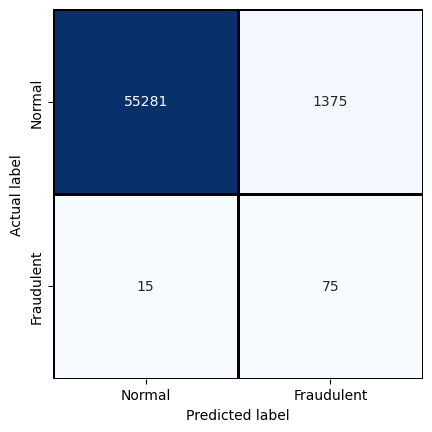

In [321]:
from sklearn.metrics import confusion_matrix

y_predicted = dt_model.predict(X_test)
mat = confusion_matrix(y_test, y_predicted)
labels = ['Normal', 'Fraudulent']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues', linewidths=1, linecolor='black',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [322]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)

TN, FP, FN, TP = confusion_matrix(y_test, y_predicted).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP)  =  75
False Positive(FP) =  1375
True Negative(TN)  =  55281
False Negative(FN) =  15
Accuracy of the binary classification = 0.976


In [55]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier(n_estimators=440)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train, y_train)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [56]:
# Neural Networks
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=29))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               3840      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,969
Trainable params: 3,969
Non-trainable params: 0
_________________________________________________________________


In [57]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100)

Epoch 1/10
2270/2270 [==============================] - 5s 2ms/step - loss: 0.0121 - accuracy: 0.9989 - val_loss: 0.0034 - val_accuracy: 0.9995
Epoch 2/10
2270/2270 [==============================] - 4s 2ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0032 - val_accuracy: 0.9993
Epoch 3/10
2270/2270 [==============================] - 4s 2ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9995
Epoch 4/10
2270/2270 [==============================] - 4s 2ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0028 - val_accuracy: 0.9995
Epoch 5/10
2270/2270 [==============================] - 4s 2ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 6/10
2270/2270 [==============================] - 4s 2ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0031 - val_accuracy: 0.9995
Epoch 7/10
2270/2270 [==============================] - 4s 2ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0031 - val_accuracy:

[]

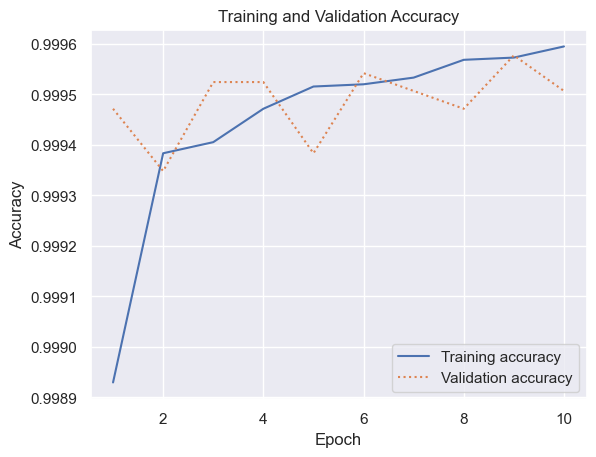

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

1774/1774 [==============================] - 2s 1ms/step


Text(110.44999999999997, 0.5, 'Actual label')

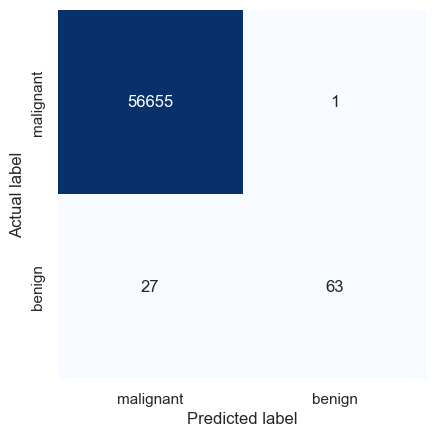

In [59]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(X_test)
mat = confusion_matrix(y_test, y_predicted)
labels = ['malignant', 'benign']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [60]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

Accuracy  Precision    Recall
Logistic Regression      0.999172   0.544444  0.890909
Support Vector Machines  0.999348   0.655556  0.907692
Decision Trees           0.999137   0.722222  0.730337
Random Forest            0.999559   0.733333  0.985075
Naive Bayes              0.977919   0.788889  0.054406
K-Nearest Neighbor       0.999471   0.700000  0.954545

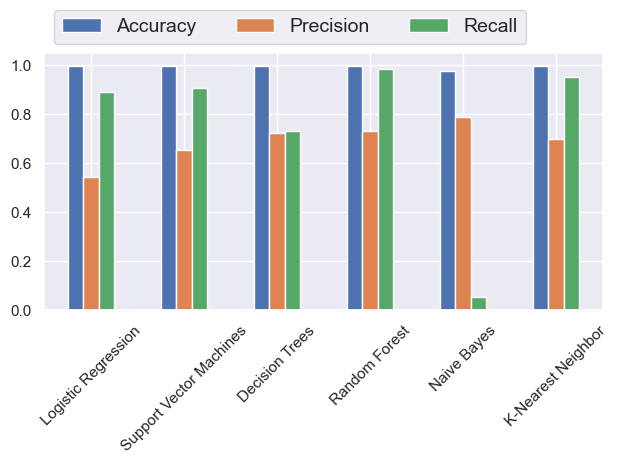

In [61]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()

### After Sampling the imbalanced Data

### 1. Random Oversampling

In [74]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier(n_estimators=80)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train_ros, y_train_ros)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [75]:
# Neural Networks
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=29))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               3840      
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,969
Trainable params: 3,969
Non-trainable params: 0
_________________________________________________________________


In [76]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100)

Epoch 1/10
2270/2270 [==============================] - 5s 2ms/step - loss: 0.0140 - accuracy: 0.9983 - val_loss: 0.0033 - val_accuracy: 0.9995
Epoch 2/10
2270/2270 [==============================] - 4s 2ms/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.0033 - val_accuracy: 0.9995
Epoch 3/10
2270/2270 [==============================] - 4s 2ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0029 - val_accuracy: 0.9995
Epoch 4/10
2270/2270 [==============================] - 4s 2ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0038 - val_accuracy: 0.9992
Epoch 5/10
2270/2270 [==============================] - 4s 2ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0030 - val_accuracy: 0.9995
Epoch 6/10
2270/2270 [==============================] - 4s 2ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0030 - val_accuracy: 0.9995
Epoch 7/10
2270/2270 [==============================] - 4s 2ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0030 - val_accuracy:

[]

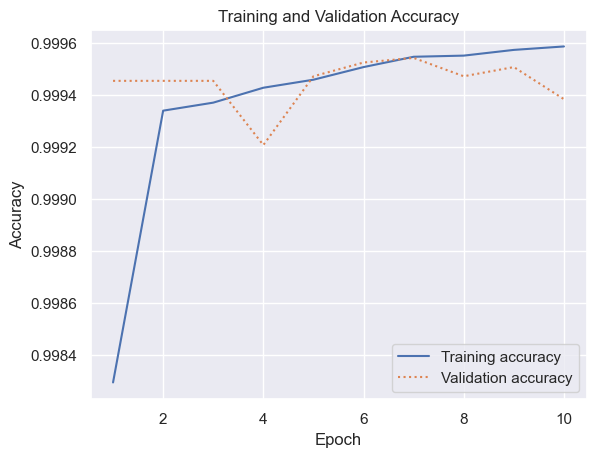

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

1774/1774 [==============================] - 2s 976us/step


Text(110.44999999999997, 0.5, 'Actual label')

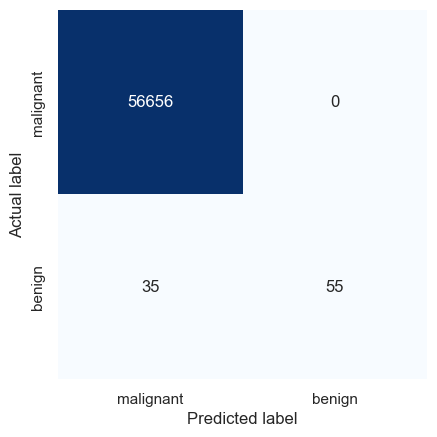

In [93]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(X_test)>0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['malignant', 'benign']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [94]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

Accuracy  Precision    Recall
Logistic Regression      0.977496   0.877778  0.058736
Support Vector Machines  0.979646   0.866667  0.063882
Decision Trees           0.999048   0.644444  0.725000
Random Forest            0.999542   0.744444  0.957143
Naive Bayes              0.973461   0.800000  0.046154
K-Nearest Neighbor       0.999207   0.777778  0.736842

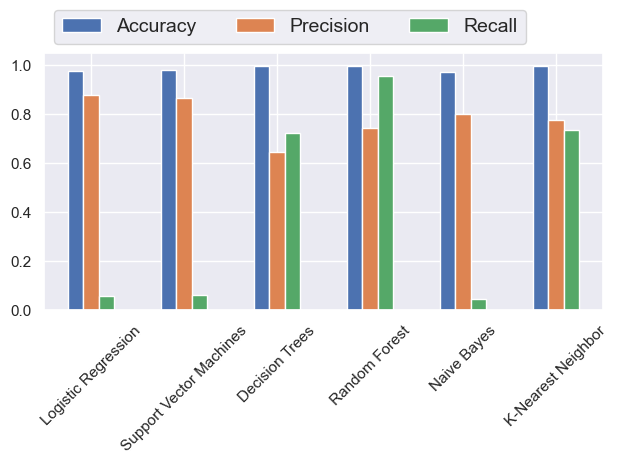

In [95]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()

### 2. SMOTE Oversampling

In [110]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier(n_estimators=30)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train_smote, y_train_smote)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [111]:
# Neural Networks
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=29))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               3840      
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,969
Trainable params: 3,969
Non-trainable params: 0
_________________________________________________________________


In [112]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100)

Epoch 1/10
2270/2270 [==============================] - 5s 2ms/step - loss: 0.0135 - accuracy: 0.9986 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 2/10
2270/2270 [==============================] - 4s 2ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0035 - val_accuracy: 0.9993
Epoch 3/10
2270/2270 [==============================] - 4s 2ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9995
Epoch 4/10
2270/2270 [==============================] - 4s 2ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 5/10
2270/2270 [==============================] - 4s 2ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0033 - val_accuracy: 0.9995
Epoch 6/10
2270/2270 [==============================] - 4s 2ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0032 - val_accuracy: 0.9995
Epoch 7/10
2270/2270 [==============================] - 4s 2ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.0031 - val_accuracy:

[]

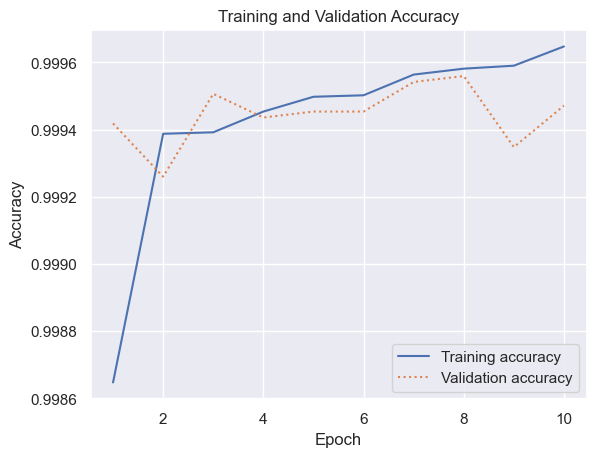

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

1774/1774 [==============================] - 2s 989us/step


Text(110.44999999999997, 0.5, 'Actual label')

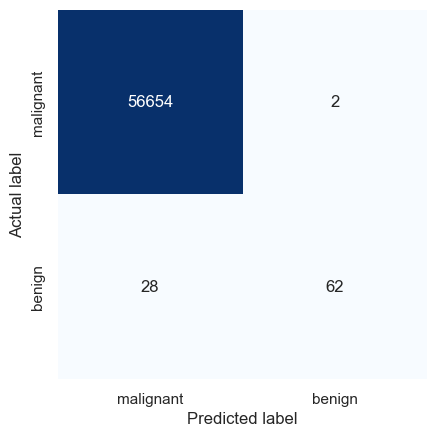

In [119]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(X_test)>0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['malignant', 'benign']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [120]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

Accuracy  Precision    Recall
Logistic Regression      0.974518   0.888889  0.052770
Support Vector Machines  0.977813   0.877778  0.059533
Decision Trees           0.997973   0.722222  0.419355
Random Forest            0.999524   0.766667  0.920000
Naive Bayes              0.976051   0.811111  0.051590
K-Nearest Neighbor       0.998520   0.800000  0.521739

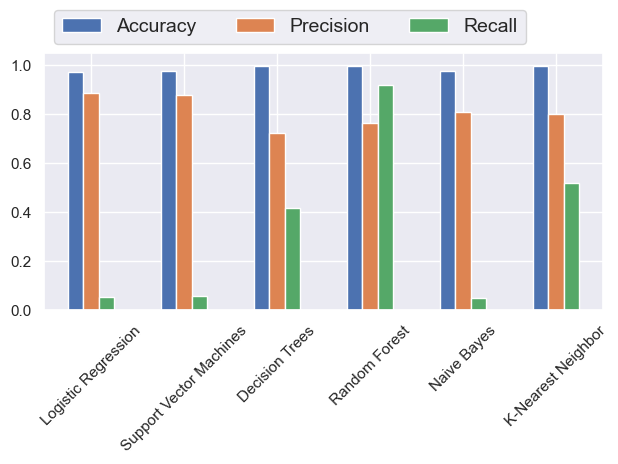

In [121]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()

### 3. Random Under-Sampling

In [151]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier(n_estimators=20)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train_rus, y_train_rus)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [152]:
# Neural Networks
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=29))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               3840      
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,969
Trainable params: 3,969
Non-trainable params: 0
_________________________________________________________________


In [153]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100)

Epoch 1/10
2270/2270 [==============================] - 5s 2ms/step - loss: 0.0184 - accuracy: 0.9963 - val_loss: 0.0033 - val_accuracy: 0.9995
Epoch 2/10
2270/2270 [==============================] - 4s 2ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0029 - val_accuracy: 0.9994
Epoch 3/10
2270/2270 [==============================] - 4s 2ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9995
Epoch 4/10
2270/2270 [==============================] - 4s 2ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9995
Epoch 5/10
2270/2270 [==============================] - 4s 2ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0034 - val_accuracy: 0.9995
Epoch 6/10
2270/2270 [==============================] - 4s 2ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0030 - val_accuracy: 0.9995
Epoch 7/10
2270/2270 [==============================] - 4s 2ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.0032 - val_accuracy:

[]

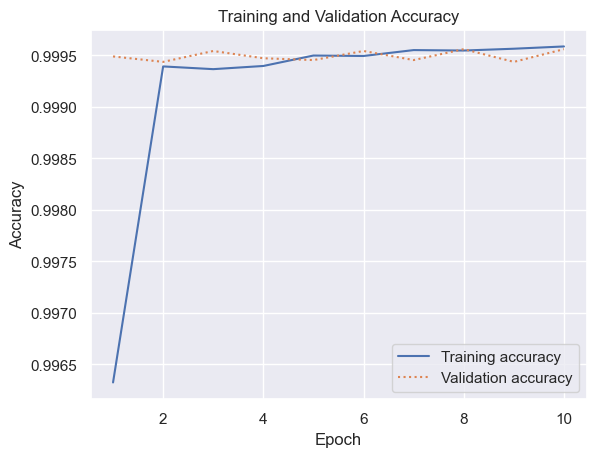

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

1774/1774 [==============================] - 2s 1ms/step


Text(110.44999999999997, 0.5, 'Actual label')

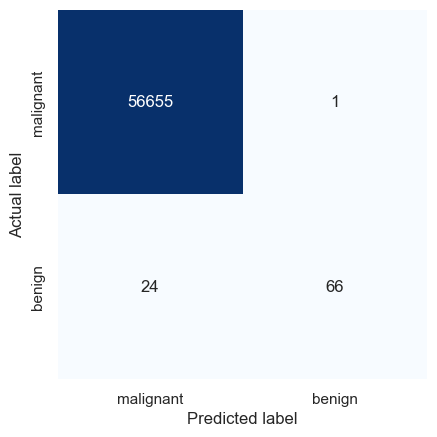

In [155]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(X_test)>0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['malignant', 'benign']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [156]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

Accuracy  Precision    Recall
Logistic Regression      0.967645   0.888889  0.041973
Support Vector Machines  0.968403   0.888889  0.042941
Decision Trees           0.900821   0.888889  0.014040
Random Forest            0.978060   0.866667  0.059497
Naive Bayes              0.973003   0.811111  0.045970
K-Nearest Neighbor       0.982096   0.855556  0.071296

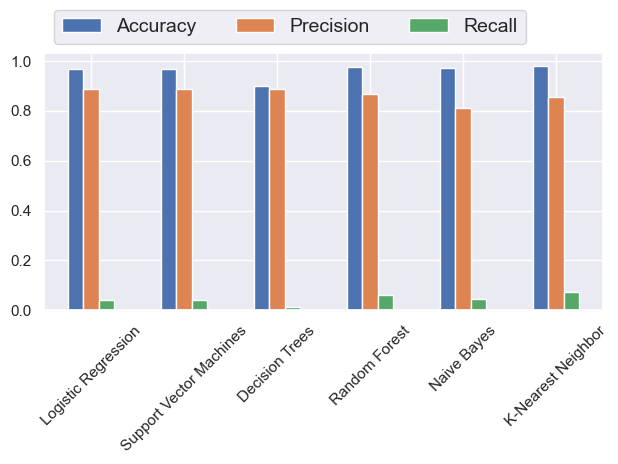

In [161]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()

### 4. Under-Sampling Using NearMiss

In [169]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier(n_estimators=30)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train_nearmiss, y_train_nearmiss)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statist

In [170]:
# Neural Networks
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=29))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               3840      
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 3,969
Trainable params: 3,969
Non-trainable params: 0
_________________________________________________________________


In [171]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100)

Epoch 1/10
2270/2270 [==============================] - 5s 2ms/step - loss: 0.0172 - accuracy: 0.9969 - val_loss: 0.0036 - val_accuracy: 0.9995
Epoch 2/10
2270/2270 [==============================] - 4s 2ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0029 - val_accuracy: 0.9995
Epoch 3/10
2270/2270 [==============================] - 5s 2ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9995
Epoch 4/10
2270/2270 [==============================] - 5s 2ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 5/10
2270/2270 [==============================] - 5s 2ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0035 - val_accuracy: 0.9992
Epoch 6/10
2270/2270 [==============================] - 5s 2ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0032 - val_accuracy: 0.9995
Epoch 7/10
2270/2270 [==============================] - 5s 2ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.0031 - val_accuracy:

[]

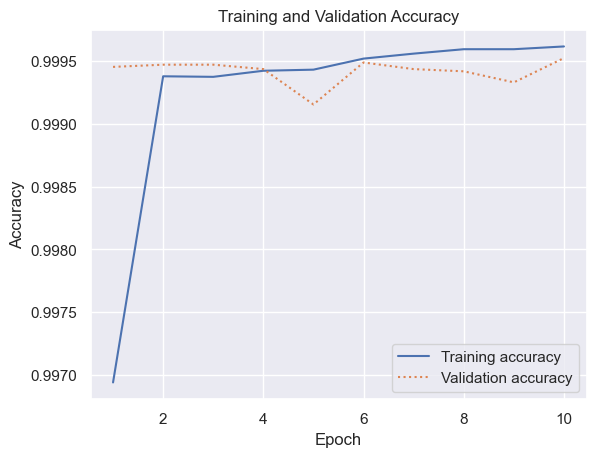

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

1774/1774 [==============================] - 2s 1ms/step


Text(110.44999999999997, 0.5, 'Actual label')

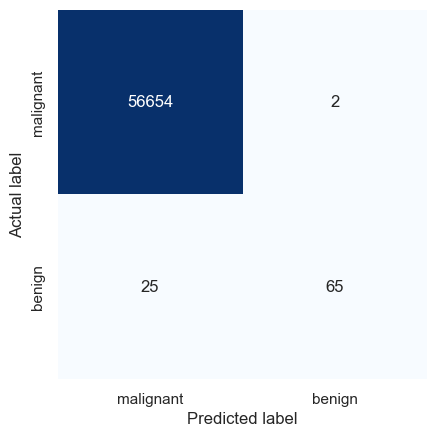

In [173]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(X_test)>0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['malignant', 'benign']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [174]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

Accuracy  Precision    Recall
Logistic Regression      0.939626   0.711111  0.018476
Support Vector Machines  0.960808   0.700000  0.027876
Decision Trees           0.719434   0.677778  0.003824
Random Forest            0.986096   0.744444  0.080432
Naive Bayes              0.993409   0.522222  0.124339
K-Nearest Neighbor       0.993938   0.722222  0.169271

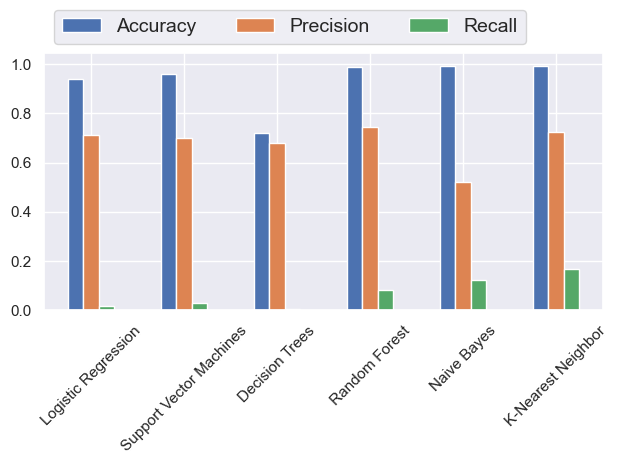

In [175]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()